In [ ]:
!rm -r /content/*.py

In [1]:
queries = []

filenames_1 = [
             "Approach_10.py",
             "train_sequence_approach_10.py",
             "base_learner_10.py",
             "helper_functions_10.py",
             "housing_params_1.json",
              "Prediction_Pipeline_10.py"
]


for fn in filenames_1:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/{fn}")

In [2]:
filenames_2 = [
               "Algorithmic_Search_10.py"
]

filenames_3 = [
              "Similar_Word_Scraper.py",
              "Embed_Generator.py"
]

for fn in filenames_2:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/{fn}")

for fn in filenames_3:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/{fn}")


In [3]:
queries

['https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/Approach_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/train_sequence_approach_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/base_learner_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/helper_functions_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/housing_params_1.json',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/Algorithmic_Search_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/Prediction_Pipeline_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/Similar_Word_Scraper.py',
 'https://raw.gi

In [4]:
import subprocess
# Download and import my module files from GitHub
result = subprocess.run(["wget", "--no-cache", "--backups=1"] + queries, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
print(result.stderr.decode("utf-8"))

--2022-05-13 03:36:30--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/Approach_10.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5088 (5.0K) [text/plain]
Failed to rename Approach_10.py to Approach_10.py.1: (2) No such file or directory
Saving to: ‘Approach_10.py’

     0K ....                                                  100% 44.5M=0s

2022-05-13 03:36:30 (44.5 MB/s) - ‘Approach_10.py’ saved [5088/5088]

--2022-05-13 03:36:30--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/housing_dataset_part_a/train_sequence_approach_10.py
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 6902 (6.7K) [text/plain]

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import json

with open("housing_params_1.json", "r") as salary_params_json:
  params = json.load(salary_params_json)

In [3]:
params

{'BASE_LAYERS': 0,
 'BASE_NEURONS': 64,
 'BATCH_SIZE': 1,
 'DATA_CYCLES': 20,
 'DATA_PATH': '/content/gdrive/MyDrive/Senior_Project_Stuff/dataset_specific_tries/housing_prediction/house_clean.csv',
 'D_FF': 512,
 'D_MODEL': 300,
 'EMBED_PATH': '/content/gdrive/MyDrive/Senior_Project_Stuff/dataset_specific_tries/housing_prediction/sequence_prediction/house_embedding_matrix.npy',
 'EPOCHS': 600,
 'EPOCH_SAVE_LIST': [99, 199, 299, 399, 499, 599],
 'FEATURE_SIZE': 11,
 'HEADS': 10,
 'HIDDEN_SIZE': 512,
 'LEARNER_EPOCHS': 1,
 'LEARNER_STEPS': 16,
 'META_EPOCHS': 16,
 'META_STEPS': 16,
 'MODEL_SAVE_PATH': 'TODO',
 'NUM_CLASSES': 1,
 'NUM_SIMILAR_WORDS': 5,
 'QUERY_SIZE': 30,
 'SEQUENCE_LENGTH': 9,
 'STARTING_EPOCH': 0,
 'STARTING_VOCAB': 'housing',
 'VERBOSE': 1,
 'VOCAB_DEPTH': 4,
 'VOCAB_PATH': '/content/gdrive/MyDrive/Senior_Project_Stuff/dataset_specific_tries/housing_prediction/sequence_prediction/house_centered_words.json'}

In [4]:
from Embed_Generator import *
from Similar_Word_Scraper import *

In [5]:
import pandas as pd

data = pd.read_csv(params["DATA_PATH"])

In [6]:
data.head()

,crime rate by town,non retail business,nitric oxides concentration,rooms,owner occupied units,employment centres,accessibility to highways,property tax,pupil to teacher,blacks,lower status of the population,value of owner occupied homes
0,1.23247,8.14,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,2.03,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,18.10,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,5.19,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,18.10,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [7]:
feature_words = []

for i in data.columns:
  feature_words.extend(i.lower().split(" "))

In [8]:
feature_words_set = list(set(feature_words))

In [9]:
feature_words_set

['oxides',
 'value',
 'pupil',
 'the',
 'crime',
 'town',
 'non',
 'accessibility',
 'by',
 'property',
 'of',
 'lower',
 'nitric',
 'employment',
 'concentration',
 'occupied',
 'rooms',
 'business',
 'status',
 'teacher',
 'owner',
 'rate',
 'highways',
 'tax',
 'to',
 'blacks',
 'homes',
 'population',
 'units',
 'centres',
 'retail']

In [10]:
Similar_Word_Scraper.initialize_nltk()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
word_scraper = Similar_Word_Scraper(feature_words_set, params["VOCAB_DEPTH"])


In [12]:
word_set = word_scraper()

0


100%|██████████| 31/31 [00:02<00:00, 14.31it/s]


Length of new queue: 365
1


100%|██████████| 365/365 [00:03<00:00, 114.86it/s]


Length of new queue: 3007
2


100%|██████████| 3007/3007 [00:34<00:00, 87.91it/s]


Length of new queue: 5659
3


100%|██████████| 5659/5659 [01:59<00:00, 47.29it/s]

Length of new queue: 4206


In [13]:
with open(params["VOCAB_PATH"], "w") as vocab_json:
  json.dump(word_set, vocab_json)

In [14]:
!python3 -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.1 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=38eb5effa8c3726ab06bb030d331cef84d513a177e4d4be3a956725d8aaaeddd
  Stored in directory: /tmp/pip-ephem-wheel-cache-g2hnikmu/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


## Restart Runtime here

In [1]:
import json
with open("housing_params_1.json", "r") as params_json:
  params = json.load(params_json)

In [2]:
with open(params["VOCAB_PATH"], "r") as vocab_json:
  vocab = json.load(vocab_json)

In [3]:
with open(params["VOCAB_PATH"], "w") as vocab_json_write:
  json.dump([i[0] for i in vocab], vocab_json_write)

In [4]:
from Embed_Generator import *


In [5]:
embed_generator = Embed_Generator([i[0] for i in vocab])

In [6]:
np_embeds = embed_generator()

100%|██████████| 9062/9062 [01:24<00:00, 107.12it/s]


In [7]:
np_embeds.shape

(9062, 300)

In [8]:
import numpy as np
with open(params["EMBED_PATH"], "wb") as f:
  np.save(f, np_embeds)

# Train Sequence

In [9]:
from train_sequence_approach_10 import *

In [10]:
part_a_interpreter, algo, logs = train_sequence("housing_params_1.json", dataset_name = "salary")

On Epoch 0
Epoch 0, Step 0: 0.451, Guess Most Similar Words: ['certain' 'people' 'areas' 'individuals' 'individual'], Target Most Similar Words: ['individual' 'individuals' 'well-being' 'public' 'country'], Target Word: crime rate by town
Cosine Similarity between most similar word/target embedding: [0.28291094 0.35437558 0.1659496  0.35982639 0.29379317], diff between max guess and max target: 0.13706407567348078


Epoch 0, Step 1: 1.153, Guess Most Similar Words: ['downstrokes' 'catkin' 'postum' 'ablaut' 'compositae'], Target Most Similar Words: ['capital' 'residential' 'housing' 'capitals' 'businesses'], Target Word: non retail business
Cosine Similarity between most similar word/target embedding: [0.32434295 0.21091068 0.0617175  0.09591784 0.37400958], diff between max guess and max target: 0.011249456999623875


Epoch 0, Step 2: 0.691, Guess Most Similar Words: ['impairments' 'caucasian' 'oriental' 'lesbian' 'massage'], Target Most Similar Words: ['planet' 'density' 'resistance' 

## Visualize Results

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(logs)

In [13]:
df.head()

,learner_mae,meta_mae,learner_weight_magnitude,learner_bias_magnitude,guess_cos_sim,max_sim_diff
0,0.395380,"tf.Tensor(0.4514365, shape=(), dtype=float32)",0.333453,[-0.0022800588],"(tf.Tensor(0.28291093841283316, shape=(), dtyp...",0.137064
1,1.079166,"tf.Tensor(1.1532834, shape=(), dtype=float32)",0.349665,[0.013756801],"(tf.Tensor(0.3243429474791476, shape=(), dtype...",0.011249
2,0.199711,"tf.Tensor(0.6910358, shape=(), dtype=float32)",0.355695,[-0.0064941905],"(tf.Tensor(0.07089378912940199, shape=(), dtyp...",0.314999
3,0.971991,"tf.Tensor(0.80175245, shape=(), dtype=float32)",0.335041,[0.015124599],"(tf.Tensor(0.10142810641008534, shape=(), dtyp...",-0.042263
4,0.793504,"tf.Tensor(0.66507554, shape=(), dtype=float32)",0.204956,[0.0147845065],"(tf.Tensor(0.19747829752766666, shape=(), dtyp...",0.221979


In [14]:
df["meta_mae_numpy"] = [a.numpy() for a in df["meta_mae"]]
df.drop("meta_mae", axis = 1, inplace = True)
df["learner_bias_magnitude_1"] = [a[0] for a in df["learner_bias_magnitude"]]
df["step"] = df.index
df["guess_cos_sim_np"] = [a.numpy() for a in df["guess_cos_sim"]]
df["guess_cos_sim_max"] = [max(a) for a in df["guess_cos_sim_np"]]
for i in range(df["guess_cos_sim_np"].iloc[0].shape[0]):
  df[f"guess_cos_sim_{i}"] = [a[i] for a in df["guess_cos_sim_np"]]
  
df.head()

,learner_mae,learner_weight_magnitude,learner_bias_magnitude,guess_cos_sim,max_sim_diff,meta_mae_numpy,learner_bias_magnitude_1,step,guess_cos_sim_np,guess_cos_sim_max,guess_cos_sim_0,guess_cos_sim_1,guess_cos_sim_2,guess_cos_sim_3,guess_cos_sim_4
0,0.395380,0.333453,[-0.0022800588],"(tf.Tensor(0.28291093841283316, shape=(), dtyp...",0.137064,0.451436,-0.002280,0,"[0.28291093841283316, 0.354375583477445, 0.165...",0.359826,0.282911,0.354376,0.165950,0.359826,0.293793
1,1.079166,0.349665,[0.013756801],"(tf.Tensor(0.3243429474791476, shape=(), dtype...",0.011249,1.153283,0.013757,1,"[0.3243429474791476, 0.21091068259259313, 0.06...",0.374010,0.324343,0.210911,0.061717,0.095918,0.374010
2,0.199711,0.355695,[-0.0064941905],"(tf.Tensor(0.07089378912940199, shape=(), dtyp...",0.314999,0.691036,-0.006494,2,"[0.07089378912940199, 0.0788717060473407, 0.11...",0.249463,0.070894,0.078872,0.118562,0.249463,0.178092
3,0.971991,0.335041,[0.015124599],"(tf.Tensor(0.10142810641008534, shape=(), dtyp...",-0.042263,0.801752,0.015125,3,"[0.10142810641008534, 0.15146289293359183, 0.0...",0.279589,0.101428,0.151463,0.042089,0.279589,0.072706
4,0.793504,0.204956,[0.0147845065],"(tf.Tensor(0.19747829752766666, shape=(), dtyp...",0.221979,0.665076,0.014785,4,"[0.19747829752766666, 0.28895974008250225, 0.1...",0.325255,0.197478,0.288960,0.107725,0.124777,0.325255


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

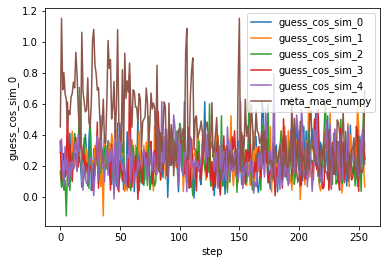

In [16]:
# sns.lineplot(data = df, x = "step", y = "learner_mae", label = "learner_mae")
for i in range(df["guess_cos_sim_np"].iloc[0].shape[0]):
  sns.lineplot(data = df, x = "step", y = f"guess_cos_sim_{i}", label = f"guess_cos_sim_{i}")
sns.lineplot(data = df, x = "step", y = "meta_mae_numpy", label = "meta_mae_numpy")
plt.legend()
# plt.ylim(0,.75)

In [17]:
df["learner_bias_magnitude_2"] = np.abs(df["learner_bias_magnitude_1"])
df["guess_cos_sim_sum"] = [sum(a) for a in df["guess_cos_sim_np"]]

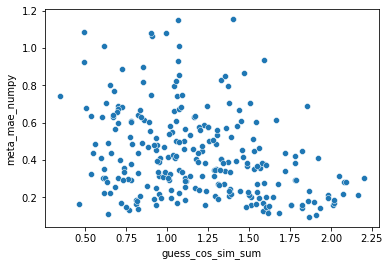

In [18]:
sns.scatterplot(data = df, x = "guess_cos_sim_sum", y = "meta_mae_numpy")

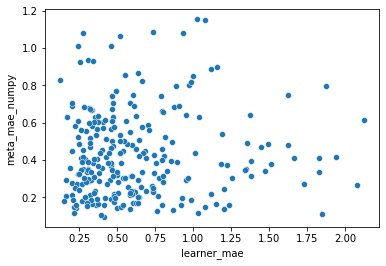

In [19]:
sns.scatterplot(data = df, x = "learner_mae", y = "meta_mae_numpy")

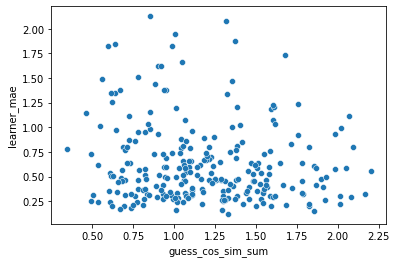

In [20]:
sns.scatterplot(data = df, x = "guess_cos_sim_sum", y = "learner_mae")

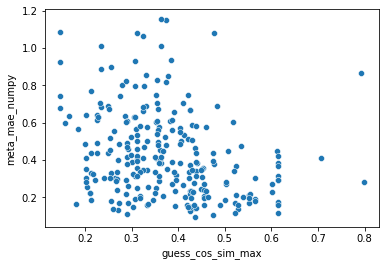

In [21]:
sns.scatterplot(data = df, x = "guess_cos_sim_max", y = "meta_mae_numpy")


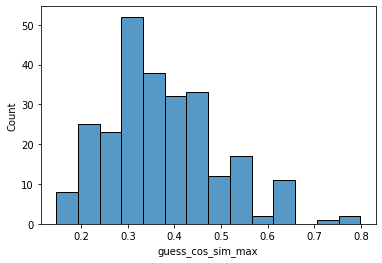

In [22]:
sns.histplot(data = df, x = "guess_cos_sim_max")

## Test Interpreter

In [23]:
from Prediction_Pipeline_10 import *

In [24]:
full_results_dict = {}
number_of_neurons_in_base_model = 16

In [27]:
import numpy as np
import json
from train_sequence_approach_10 import tf
from helper_functions_10 import *
with open("housing_params_1.json", "r") as params_json:
  params = json.load(params_json)

vocab, pad_included_mat, vocab_to_number, embed_mat = load_embed_and_dictionary(params["VOCAB_PATH"], params["EMBED_PATH"])

dataset_generator = load_dataset_generator(params["DATA_PATH"], dataset_name = "salary")

metrics = {"MeanAbsoluteError": tf.keras.metrics.MeanAbsoluteError()}

for train_test_batch in dataset_generator:

  batch = train_test_batch
  X_train, X_test, y_train, y_test = train_test_batch
  if y_train.name in full_results_dict.keys():
    break
  print(y_train.name)
  base_model = tf.keras.models.Sequential([
                                         tf.keras.layers.Dense(number_of_neurons_in_base_model, activation = "relu"),
                                         tf.keras.layers.Dense(1, activation = "linear")
  ])

  base_model.compile(
      loss = "mse",
      optimizer = "adam",
      metrics = ["mae"]
  )
  
  feature_embeds = np.array([pad_text(w, pad_included_mat, vocab_to_number, params["SEQUENCE_LENGTH"]) for w in batch[0].columns]).reshape(1, batch[0].shape[1], params["SEQUENCE_LENGTH"], -1)
  averaged_embeds = np.array([average_embed(w, pad_included_mat, vocab_to_number) for w in batch[0].columns]).reshape(1, batch[0].shape[1], -1)
  interp_callback_training = Train_Pipeline(base_model, part_a_interpreter, algo, -1, feature_embeds, averaged_embeds, number_of_neurons_in_base_model, tf.keras.losses.MeanSquaredError(), tf.keras.optimizers.Adam())
  interp_callback_training.fit(X_train, y_train, 64, 1)
  final_preds = []
  for i in interp_callback_training.interpreter_callback.interpreter_output_words:
    final_preds.append(i[-1])
  full_results_dict[y_train.name] = final_preds

crime rate by town
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 27.43it/s]
/content/Algorithmic_Search_10.py:27: RuntimeWarning: invalid value encountered in true_divide
  w = np.squeeze((feature_embeds / np.sqrt((feature_embeds ** 2).sum(axis = -1))[..., np.newaxis]))


ValueError: ignored

In [ ]:
full_results_dict["nitric oxides concentration"]

[array(['less', 'one', 'area', 'greater', 'places'], dtype='<U22'),
 array(['less', 'greater', 'one', 'people', 'area'], dtype='<U22'),
 array(['places', 'one', 'less', 'area', 'greater'], dtype='<U22'),
 array(['greater', 'less', 'one', 'area', 'places'], dtype='<U22'),
 array(['banner', 'baltimore', 'coral', 'florida', 'star-spangled'],
       dtype='<U22'),
 array(['less', 'greater', 'area', 'one', 'places'], dtype='<U22'),
 array(['banner', 'baltimore', 'coral', 'florida', 'star-spangled'],
       dtype='<U22'),
 array(['area', 'greater', 'one', 'less', 'people'], dtype='<U22'),
 array(['one', 'greater', 'less', 'area', 'people'], dtype='<U22'),
 array(['one', 'greater', 'less', 'area', 'places'], dtype='<U22'),
 array(['one', 'greater', 'less', 'people', 'area'], dtype='<U22'),
 array(['less', 'one', 'greater', 'area', 'places'], dtype='<U22'),
 array(['area', 'one', 'greater', 'less', 'people'], dtype='<U22'),
 array(['one', 'greater', 'less', 'area', 'places'], dtype='<U22'),
 a

In [ ]:
for k in full_results_dict.keys():
  full_results_dict[k] = [i.tolist() for i in full_results_dict[k]]

In [ ]:
import json

with open("housing_interpretation_results_dynamic.json", "w") as results_json:
  json.dump(full_results_dict, results_json)